# Bank_Personal_Loan_Modelling || 95% Acc Steps:

# 1-Importing Libraries.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from google.colab import drive

# 2-Showing Data.

In [ ]:
data = pd.read_csv("/content/Bank_Personal_Loan_Modelling.csv")
pd.set_option('display.max_rows', None)
data


ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  \
0        1   25           1      49     91107       4   1.60          1   
1        2   45          19      34     90089       3   1.50          1   
2        3   39          15      11     94720       1   1.00          1   
3        4   35           9     100     94112       1   2.70          2   
4        5   35           8      45     91330       4   1.00          2   
5        6   37          13      29     92121       4   0.40          2   
6        7   53          27      72     91711       2   1.50          2   
7        8   50          24      22     93943       1   0.30          3   
8        9   35          10      81     90089       3   0.60          2   
9       10   34           9     180     93023       1   8.90          3   
10      11   65          39     105     94710       4   2.40          3   
11      12   29           5      45     90277       3   0.10          2   
12      13   48          23     114     93106       2   3.80          3   
13      14   59          32      40     94920       4   2.50          2   
14      15   67          41     112     91741       1   2.00          1   
15      16   60          30      22     95054       1   1.50          3   
16      17   38          14     130     95010       4   4.70          3   
17      18   42          18      81     94305       4   2.40          1   
18      19   46          21     193     91604       2   8.10          3   
19      20   55          28      21     94720       1   0.50          2   
20      21   56          31      25     94015       4   0.90          2   
21      22   57          27      63     90095       3   2.00          3   
22      23   29           5      62     90277       1   1.20          1   
23      24   44          18      43     91320       2   0.70          1   
24      25   36          11     152     95521       2   3.90          1   
25      26   43          19      29     94305       3   0.50          1   
26      27   40          16      83     95064       4   0.20          3   
27      28   46          20     158     90064       1   2.40          1   
28      29   56          30      48     94539       1   2.20          3   
29      30   38          13     119     94104       1   3.30          2   
30      31   59          35      35     93106       1   1.20          3   
31      32   40          16      29     94117       1   2.00          2   
32      33   53          28      41     94801       2   0.60          3   
33      34   30           6      18     91330       3   0.90          3   
34      35   31           5      50     94035       4   1.80          3   
35      36   48          24      81     92647       3   0.70          1   
36      37   59          35     121     94720       1   2.90          1   
37      38   51          25      71     95814       1   1.40          3   
38      39   42          18     141     94114       3   5.00          3   
39      40   38          13      80     94115       4   0.70          3   
40      41   57          32      84     92672       3   1.60          3   
41      42   34           9      60     94122       3   2.30          1   
42      43   32           7     132     90019       4   1.10          2   
43      44   39          15      45     95616       1   0.70          1   
44      45   46          20     104     94065       1   5.70          1   
45      46   57          31      52     94720       4   2.50          1   
46      47   39          14      43     95014       3   0.70          2   
47      48   37          12     194     91380       4   0.20          3   
48      49   56          26      81     95747       2   4.50          3   
49      50   40          16      49     92373       1   1.80          1   
50      51   32           8       8     92093       4   0.70          2   
51      52   61          37     131     94720       1   2.90          1   
52      53   30           6      

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# 3-Describing Data ,Showing Nan values and Dublicates.

In [ ]:
print("** Dataframe information before preprocessing **\n") # title
print(f"number of rows: {data.shape[0]}\nnumber of columns: {data.shape[1]}") # number of rows and columns
print('***'*10)
print(data.describe().T) # describtive statistical information of the data
print('***'*10)
print(f"types of columns: \n\n{data.dtypes}") # shows the types of columns
print('***'*10)
print(f"null values in each column:\n\n{(data.isnull().sum()/(data.shape[0])*100)}\n\nSum of duplicates: {data.duplicated().sum()}") # shows duplicates
# and null values

** Dataframe information before preprocessing **

number of rows: 5000
number of columns: 14
******************************
                     count          mean          std     min       25%  \
ID                  5000.0   2500.500000  1443.520003     1.0   1250.75   
Age                 5000.0     45.338400    11.463166    23.0     35.00   
Experience          5000.0     20.104600    11.467954    -3.0     10.00   
Income              5000.0     73.774200    46.033729     8.0     39.00   
ZIP Code            5000.0  93152.503000  2121.852197  9307.0  91911.00   
Family              5000.0      2.396400     1.147663     1.0      1.00   
CCAvg               5000.0      1.937938     1.747659     0.0      0.70   
Education           5000.0      1.881000     0.839869     1.0      1.00   
Mortgage            5000.0     56.498800   101.713802     0.0      0.00   
Personal Loan       5000.0      0.096000     0.294621     0.0      0.00   
Securities Account  5000.0      0.104400     0.3058

In [ ]:
data.describe()

ID          Age   Experience       Income      ZIP Code  \
count  5000.000000  5000.000000  5000.000000  5000.000000   5000.000000   
mean   2500.500000    45.338400    20.104600    73.774200  93152.503000   
std    1443.520003    11.463166    11.467954    46.033729   2121.852197   
min       1.000000    23.000000    -3.000000     8.000000   9307.000000   
25%    1250.750000    35.000000    10.000000    39.000000  91911.000000   
50%    2500.500000    45.000000    20.000000    64.000000  93437.000000   
75%    3750.250000    55.000000    30.000000    98.000000  94608.000000   
max    5000.000000    67.000000    43.000000   224.000000  96651.000000   

            Family        CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000  5000.000000    5000.000000   
mean      2.396400     1.937938     1.881000    56.498800       0.096000   
std       1.147663     1.747659     0.839869   101.713802       0.294621   
min       1.000000     0.000000     1.000000     0.000000       0.000000   
25%       1.000000     0.700000     1.000000     0.000000       0.000000   
50%       2.000000     1.500000     2.000000     0.000000       0.000000   
75%       3.000000     2.500000     3.000000   101.000000       0.000000   
max       4.000000    10.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

# 4-Visulization of corelation of data columns before removing outliers.

<Axes: >

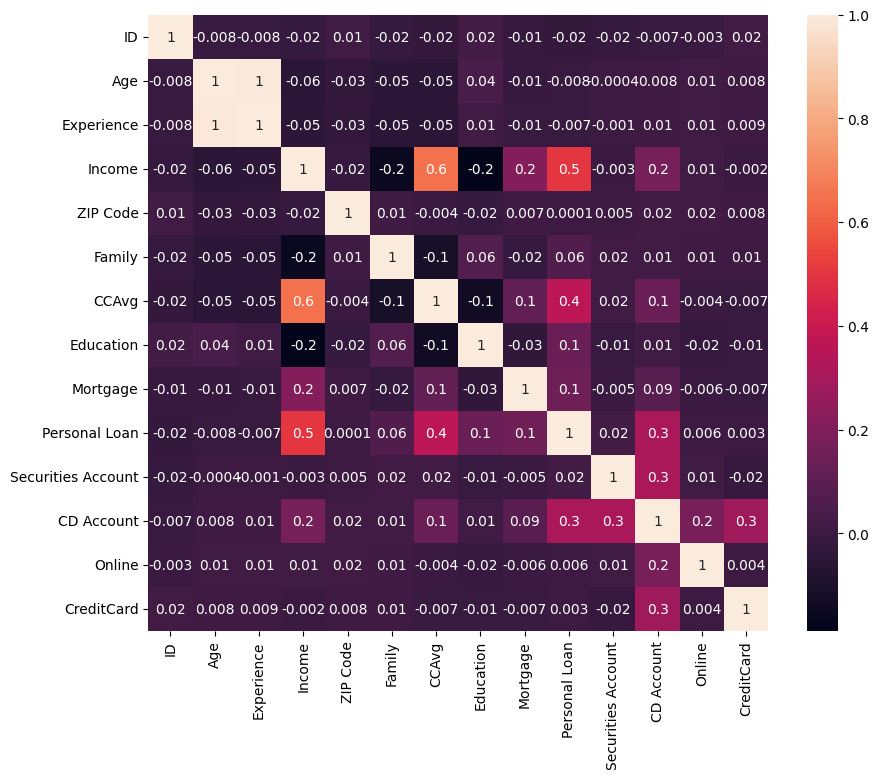

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='0.1g')

# 5-Drobing cloumns which (Personal Loan) is not affected with.

In [ ]:
# Check if the columns exist in the data frame
column_names = list(data.columns)
print(column_names)

['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']


In [ ]:
# prompt: remove ID, Age, Experience

data.drop(['ID', 'Age', 'Experience', 'ZIP Code'], axis=1, inplace=True)


Income                   Axes(0.125,0.867124;0.0129599x0.0128763)
Family                Axes(0.140552,0.867124;0.0129599x0.0128763)
CCAvg                 Axes(0.156104,0.867124;0.0129599x0.0128763)
Education             Axes(0.171656,0.867124;0.0129599x0.0128763)
Mortgage              Axes(0.187207,0.867124;0.0129599x0.0128763)
Personal Loan         Axes(0.202759,0.867124;0.0129599x0.0128763)
Securities Account    Axes(0.218311,0.867124;0.0129599x0.0128763)
CD Account            Axes(0.233863,0.867124;0.0129599x0.0128763)
Online                Axes(0.249415,0.867124;0.0129599x0.0128763)
CreditCard            Axes(0.264967,0.867124;0.0129599x0.0128763)
dtype: object

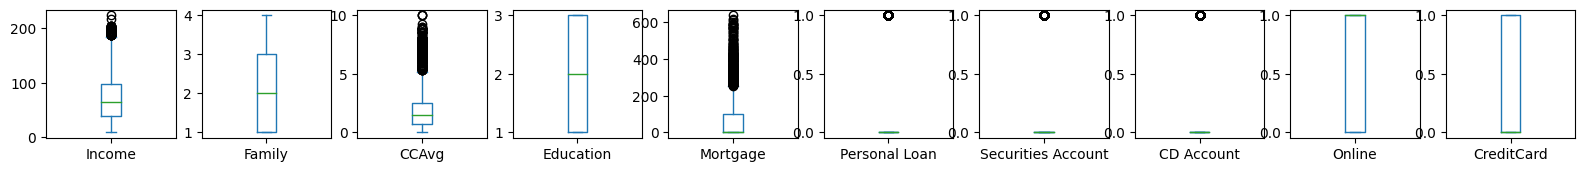

In [ ]:
data.plot(kind="box",subplots=True ,figsize=(100,100),layout=(50,50))

Personal Loan    Axes(0.125,0.653529;0.227941x0.226471)
dtype: object

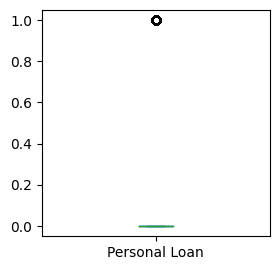

In [ ]:
data['Personal Loan'].plot(kind="box",subplots=True ,figsize=(10,10),layout=(3,3))

In [ ]:
data.columns

Index(['Income', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Personal Loan',
       'Securities Account', 'CD Account', 'Online', 'CreditCard'],
      dtype='object')

# 6-Removing Outliers with IQR Method.

In [ ]:
df=data.copy()
#df=df.drop(df.iloc[:, 9:11], inplace=True, axis=1)
outlsss=['Income', 'Family', 'CCAvg', 'Education', 'Mortgage']
for feature in outlsss:
    Q1 = data[feature].quantile(0.25)
    Q3 =data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound=Q1-(1.5*IQR)
    upper_bound=Q3+(1.5*IQR)
    new_data=data.loc[(data[feature]>= lower_bound) & (data[feature]<= upper_bound)]
    data[feature]=new_data[feature]
    print(f"{feature} upper {upper_bound} lower{lower_bound}")

Income upper 186.5 lower-49.5
Family upper 6.0 lower-2.0
CCAvg upper 5.2 lower-2.0
Education upper 6.0 lower-2.0
Mortgage upper 252.5 lower-151.5


In [ ]:
# data.plot(kind="box",subplots=True ,figsize=(100,100),layout=(50,50))

In [ ]:
# data.shape(5000,11)

# 7-compensating of Nan Values in 0s.

In [ ]:
Nan = ['Personal Loan','Securities Account','CD Account']
for l in Nan :
       data[l].fillna(0, inplace = True)

In [ ]:
# data= data.dropna()

In [ ]:
# data.shape (4397, 11)

# 8-Visulization of corelation of data columns after removing outliers.

<Axes: >

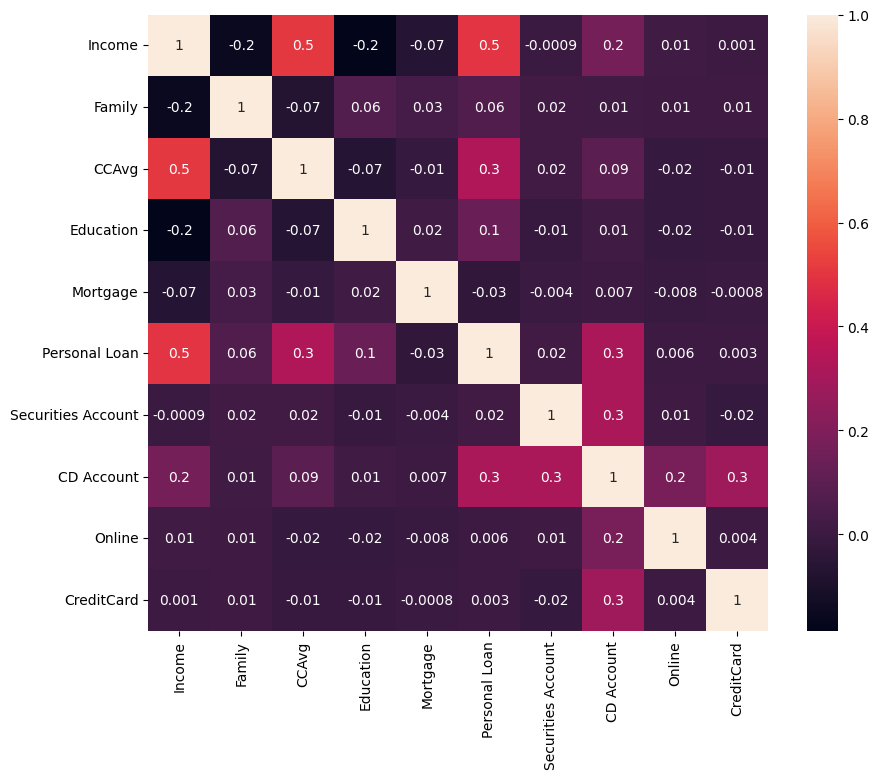

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,fmt='0.1g')

In [ ]:
data

Income  Family  CCAvg  Education  Mortgage  Personal Loan  \
0       49.0       4   1.60          1       0.0              0   
1       34.0       3   1.50          1       0.0              0   
2       11.0       1   1.00          1       0.0              0   
3      100.0       1   2.70          2       0.0              0   
4       45.0       4   1.00          2       0.0              0   
5       29.0       4   0.40          2     155.0              0   
6       72.0       2   1.50          2       0.0              0   
7       22.0       1   0.30          3       0.0              0   
8       81.0       3   0.60          2     104.0              0   
9      180.0       1    NaN          3       0.0              1   
10     105.0       4   2.40          3       0.0              0   
11      45.0       3   0.10          2       0.0              0   
12     114.0       2   3.80          3       0.0              0   
13      40.0       4   2.50          2       0.0              0   
14     112.0       1   2.00          1       0.0              0   
15      22.0       1   1.50          3       0.0              0   
16     130.0       4   4.70          3     134.0              1   
17      81.0       4   2.40          1       0.0              0   
18       NaN       2    NaN          3       0.0              1   
19      21.0       1   0.50          2       0.0              0   
20      25.0       4   0.90          2     111.0              0   
21      63.0       3   2.00          3       0.0              0   
22      62.0       1   1.20          1       NaN              0   
23      43.0       2   0.70          1     163.0              0   
24     152.0       2   3.90          1     159.0              0   
25      29.0       3   0.50          1      97.0              0   
26      83.0       4   0.20          3       0.0              0   
27     158.0       1   2.40          1       0.0              0   
28      48.0       1   2.20          3       0.0              0   
29     119.0       1   3.30          2       0.0              1   
30      35.0       1   1.20          3     122.0              0   
31      29.0       1   2.00          2       0.0              0   
32      41.0       2   0.60          3     193.0              0   
33      18.0       3   0.90          3       0.0              0   
34      50.0       4   1.80          3       0.0              0   
35      81.0       3   0.70          1       0.0              0   
36     121.0       1   2.90          1       0.0              0   
37      71.0       1   1.40          3     198.0              0   
38     141.0       3   5.00          3       0.0              1   
39      80.0       4   0.70          3       NaN              0   
40      84.0       3   1.60          3       0.0              0   
41      60.0       3   2.30          1       0.0              0   
42     132.0       4   1.10          2       NaN              1   
43      45.0       1   0.70          1       0.0              0   
44     104.0       1    NaN          1       0.0              0   
45      52.0       4   2.50          1       0.0              0   
46      43.0       3   0.70          2     153.0              0   
47       NaN       4   0.20          3     211.0              1   
48      81.0       2   4.50          3       0.0              0   
49      49.0       1   1.80          1       0.0              0   
50       8.0       4   0.70          2       0.0              0   
51     131.0       1   2.90          1       0.0              0   
52      72.0       1   0.10          1     207.0              0   
53       NaN       3   2.10          3     240.0              1   
54      44.0       1   0.20          3       0.0              0   
55     139.0       2    NaN          1       0.0              0   
56      29.0       3   0.10          2       0.0              0   
57     131.0       2   1.20          3       0.0              1   
58      93.0       2   0.20          1       0.0     

In [ ]:
print(data['Personal Loan'].unique())
print(data['CD Account'].unique())
print(data['Securities Account'].unique())


[0 1]
[0 1]
[1 0]


# 9-Dividing Features and label into x and y and compensating Nan values form the Divide.

In [ ]:
x = data.drop('Personal Loan', axis=1)
y = data['Personal Loan']

In [ ]:
x[x.isnull() == True]
y[y.isnull() == True]

Series([], Name: Personal Loan, dtype: int64)

In [ ]:
x.fillna(method = 'ffill', inplace = True)
y.fillna(method = 'ffill', inplace = True)

# 10-Upsampling of x and y cause 0s values is greaters than 1s values.

In [ ]:
# Example of using SMOTE for oversampling
smote = SMOTEENN()
x_re, y_re = smote.fit_resample(x, y)

# # Example of using random undersampling
# undersampler = RandomUnderSampler()
# X_resampled, y_resampled = undersampler.fit_resample(X, y)

# 11-Spliting the new x and y into train and test data with 25% test data.

In [ ]:
x_train , x_test , y_train ,y_test = train_test_split(x_re,y_re , test_size= 0.25,random_state=42 )

# 12-Making object from Logistic Regression.

In [ ]:
lr = LogisticRegression()

In [ ]:
# prompt: build SigMoid function, hàm mất mát và in ra kết quả (không bao gồm accuracy)

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def loss(y_true, y_predicted):
  y_predicted = np.clip(y_predicted, 1e-15, 1 - 1e-15)
  return -np.mean(y_true * np.log(y_predicted) + (1 - y_true) * np.log(1 - y_predicted))

# Train the model
lr.fit(x_train, y_train)

# Make predictions
y_pred = lr.predict(x_test)

# Calculate the loss
loss_value = loss(y_test, y_pred)

# Print the loss
print(f"Loss: {loss_value}")


Loss: 3.4421158445715605


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# 13-Getting Train and Test scores.

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
lr.score(x_train,y_train)

0.8994950317641309

In [ ]:
lr.score(x_test,y_test)

0.9003419638495359

In [ ]:
# prompt: print precision, recall and f1 score bằng công thức chi tiết

from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision, recall and f1 score using the formulas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = 2 * precision * recall / (precision + recall)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Precision: 0.8876003568242641
Recall: 0.9273066169617894
F1 score: 0.9070191431175935


# 14-Grid Search Code if you want to apply.

In [ ]:
#Code
logit = LogisticRegression(max_iter = 10000)
C = [0.25, 0.5, 0.75, 1]
test_scores = []
train_scores=[]
para=[]
for choice in C:
  logit.set_params(C=choice)
  logit.fit(x_train, y_train)
  test_scores.append(logit.score(x_test, y_test))
  train_scores.append(logit.score(x_train, y_train))
  para.append(choice)

print(f"{para}{test_scores}")
print(f"{para}{train_scores}")


[0.25, 0.5, 0.75, 1][0.8998534440644846, 0.8993649242794333, 0.8974108451392281, 0.8974108451392281]
[0.25, 0.5, 0.75, 1][0.8996579247434435, 0.9009610685779443, 0.9011239615572569, 0.9003094966606939]
[0.25, 0.5, 0.75, 1][0.8998534440644846, 0.8993649242794333, 0.8974108451392281, 0.8974108451392281]
[0.25, 0.5, 0.75, 1][0.8996579247434435, 0.9009610685779443, 0.9011239615572569, 0.9003094966606939]
